Objective

This project aims to build and contrast two machine learning models designed for sentiment classification, with a specific focus on understanding how different text representation techniques—Bag-of-Words (BoW) and Term Frequency–Inverse Document Frequency (TF-IDF)—influence model performance.

Project Overview

To achieve this, the workflow is structured into four major components:

1. Text Preprocessing and Corpus Refinement

The dataset will be imported and passed through an extensive NLP preprocessing pipeline. This includes converting text to lowercase, stripping out noise such as punctuation, HTML elements, URLs, and non-essential characters, and removing stopwords. Additional steps include expanding acronyms, correcting misspellings, and ensuring all text is normalized to create a clean and consistent corpus suitable for vectorization.

2. Feature Representation

Two independent sets of numerical features will be generated from the cleaned text:

CountVectorizer to create a Bag-of-Words representation

TfidfVectorizer to capture term importance through TF-IDF weights

These feature sets form the basis for model input.

3. Model Development and Performance Assessment

A Random Forest classifier will be trained separately on the BoW features and the TF-IDF features. For both models, performance will be measured using standard evaluation metrics, including accuracy, precision, recall, and F1-score.

4. Comparative Evaluation

Finally, a detailed comparison will highlight how the two vectorization approaches affect classification outcomes. The analysis will tie the results back to the inherent differences between BoW and TF-IDF—such as frequency sensitivity, term weighting, and vocabulary emphasis—to explain why one representation may outperform the other.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankurzing/sentiment-analysis-for-financial-news")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sentiment-analysis-for-financial-news' dataset.
Path to dataset files: /kaggle/input/sentiment-analysis-for-financial-news


In [2]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 48.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import sys

# Dictionary to store library versions
library_versions = {
    'pandas': 'N/A',
    'numpy': 'N/A',
    're': 'N/A', # re is a built-in module, usually doesn't have __version__
    'nltk': 'N/A',
    'pyspellchecker': 'N/A',
    'sklearn': 'N/A'
}

# Get versions of installed libraries
try:
    import pandas
    library_versions['pandas'] = pandas.__version__
except ImportError:
    pass

try:
    import numpy
    library_versions['numpy'] = numpy.__version__
except ImportError:
    pass

try:
    import nltk
    library_versions['nltk'] = nltk.__version__
except ImportError:
    pass

try:
    import spellchecker
    library_versions['pyspellchecker'] = spellchecker.__version__
except ImportError:
    pass

try:
    import sklearn
    library_versions['sklearn'] = sklearn.__version__
except ImportError:
    pass

# Create a DataFrame from the dictionary
versions_df = pd.DataFrame(list(library_versions.items()), columns=['Library', 'Version'])

# Display the DataFrame
display(versions_df)

,Library,Version
0,pandas,2.2.2
1,numpy,2.0.2
2,re,N/A
3,nltk,3.9.1
4,pyspellchecker,0.8.3
5,sklearn,1.6.1


In [11]:
import os
import pandas as pd

# List contents of the downloaded directory
# Correcting the file_path to use the `path` variable from the previous download
file_path = path  # `path` variable holds: '/kaggle/input/sentiment-analysis-for-financial-news'
print(os.listdir(file_path))

['all-data.csv', 'FinancialPhraseBank']


In [12]:
import pandas as pd

# Construct the full path to the CSV file
csv_file_path = os.path.join(file_path, 'all-data.csv')

# Load the CSV into a pandas DataFrame
df = pd.read_csv(csv_file_path, encoding='latin-1', header=None)

# Display the first 5 rows of the DataFrame
display(df.head())

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


Data Source Acknowledgment

This project leverages the Financial News Sentiment Dataset available on Kaggle, which serves as the foundation for all analyses performed.

Dataset Title: Sentiment Analysis for Financial News
Contributor: Ankur Singh
Source: Kaggle Dataset Repository
Link: (Kaggle dataset page by Ankur Singh)

The dataset provides a collection of financial news headlines paired with sentiment labels such as positive, negative, and neutral. Its structure and relevance to real-world financial text make it an excellent choice for evaluating how different text vectorization strategies—BoW and TF-IDF—affect machine learning–based sentiment classification.

# Rename DataFrame Columns

Rename the columns of the DataFrame 'df' to meaningful names like 'Sentiment' and 'Text' for better readability and usability.

# Rationale:
To enhance clarity and make the DataFrame easier to work with, the existing unnamed columns will be assigned meaningful labels. Specifically, column 0 will be renamed to 'Sentiment', and column 1 will be renamed to 'Text'. This improves readability and ensures the dataset is more intuitive for subsequent preprocessing and modeling tasks.

In [13]:
df.rename(columns={0: 'Sentiment', 1: 'Text'}, inplace=True)
display(df.head())

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [14]:
X = df['Text']
y = df['Sentiment']

print("X head:")
display(X.head())

print("\ny head:")
display(y.head())

X head:


,Text
0,"According to Gran , the company has no plans t..."
1,Technopolis plans to develop in stages an area...
2,The international electronic industry company ...
3,With the new production plant the company woul...
4,According to the company 's updated strategy f...



y head:


,Sentiment
0,neutral
1,neutral
2,negative
3,positive
4,positive


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3876,)
Shape of X_test: (970,)
Shape of y_train: (3876,)
Shape of y_test: (970,)


In [16]:
print("type of X_train: {}".format( type(X_train)))

print(" length of text_train: {}".format(len( X_train)))

print("\n\n text_train[5]:\n{}".format( X_train[0:6]))

type of X_train: <class 'pandas.core.series.Series'>
 length of text_train: 3876


 text_train[5]:
432     In Russia , Raisio 's Food Division 's home ma...
3071    Operators only need to learn how to use one de...
289     The company expects its net sales in the first...
2588    The bridge will be 1.2 km long and is located ...
4121    Nokia and Capcom announced that Resident Evil ...
4489    At the same time I am delighted by the fact th...
Name: Text, dtype: object


In [17]:
print("type of X_test: {}".format( type(X_test)))

print(" length of X_test: {}".format(len(X_test)))

print("\n\n X_test[6]:\n{}".format( X_test.iloc[6]))

print("\n\n y_test[6]:\n{}".format (y_test.iloc[6]))

type of X_test: <class 'pandas.core.series.Series'>
 length of X_test: 970


 X_test[6]:
Finnish-owned contract manufacturer of electronics Elcoteq Hungary Kft has announced plans to recruit more than 650 new staffers to fulfill new orders in P+_cs , where the company has two plants .


 y_test[6]:
positive


# Text Cleaning

#Task
Define a Python function to clean text data by converting it to lowercase, removing URLs, stripping HTML tags, and removing all non-alphanumeric characters (except spaces) and extra spaces, then apply this function to the X_train and X_test Series.

##Define Text Cleaning Function (URLs, HTML, Special Characters, Lowercasing)

Developing a dedicated function that accepts a raw text input and applies a series of foundational preprocessing steps. These include: converting all characters to lowercase, removing URLs, eliminating HTML elements, and stripping out any characters that are not alphanumeric (while preserving spaces). The function should also condense unnecessary whitespace. Combining these steps into a single reusable function streamlines the text-cleaning workflow and ensures consistent preprocessing throughout the project.

In [18]:
#Rationale:
#To standardize the preprocessing of textual data
#creating a clean_text function that executes all essential cleaning steps outlined in the instructions.
#This includes converting text to lowercase, removing URLs, eliminating HTML tags, filtering out non-alphanumeric characters, and normalizing whitespace.
#The Python re module will be used to implement these operations efficiently.


import re

def clean_text(text):
    """Performs several text cleaning operations on the input string."""
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # 3. Strip HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 4. Remove all non-alphanumeric characters (except spaces)
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)

    # 5. Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Test the function with a sample text
sample_text = "This is a sample text with a URL: https://example.com/page?id=123, HTML <b>tags</b>, special characters like @#$%^&*, and multiple spaces. <br /><br /> Another line!"
cleaned_sample_text = clean_text(sample_text)

print("Original Text:", sample_text)
print("Cleaned Text:", cleaned_sample_text)


Original Text: This is a sample text with a URL: https://example.com/page?id=123, HTML <b>tags</b>, special characters like @#$%^&*, and multiple spaces. <br /><br /> Another line!
Cleaned Text: this is a sample text with a url html tags special characters like and multiple spaces another line


In [19]:
#Rationale:
#After validating the clean_text function,
#the next step is to apply it to the 'Text' column in both X_train and X_test.
#This ensures that the training and testing datasets undergo the same preprocessing workflow, resulting in consistently cleaned text before vectorization and model training.

X_train_cleaned = X_train.apply(clean_text)
X_test_cleaned = X_test.apply(clean_text)

print("Original X_train head (first 5 entries):")
display(X_train.head())

print("\nCleaned X_train head (first 5 entries):")
display(X_train_cleaned.head())

print("\nOriginal X_test head (first 5 entries):")
display(X_test.head())

print("\nCleaned X_test head (first 5 entries):")
display(X_test_cleaned.head())

Original X_train head (first 5 entries):


,Text
432,"In Russia , Raisio 's Food Division 's home ma..."
3071,Operators only need to learn how to use one de...
289,The company expects its net sales in the first...
2588,The bridge will be 1.2 km long and is located ...
4121,Nokia and Capcom announced that Resident Evil ...



Cleaned X_train head (first 5 entries):


,Text
432,in russia raisio s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 km long and is located b...
4121,nokia and capcom announced that resident evil ...



Original X_test head (first 5 entries):


,Text
3207,The company was supposed to deliver machinery ...
1684,UNC Charlotte would also deploy SSH Tectia Con...
1044,"In 2009 , Lee & Man had a combined annual prod..."
4145,`` That 's a very high figure on the European ...
1538,"In Finland , the corresponding service is Alma..."



Cleaned X_test head (first 5 entries):


,Text
3207,the company was supposed to deliver machinery ...
1684,unc charlotte would also deploy ssh tectia con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...


# Task

Creating a Python function named correct_spellings that accepts a text string and automatically corrects spelling mistakes using the SpellChecker class from the pyspellchecker library. The function should process the input text, replace any misspelled words with their most likely correct forms, and return the corrected version of the text.

## Task

Implement a Python function named correct_spellings that receives a text string and applies spelling correction using the SpellChecker class from the pyspellchecker library. The function should identify misspelled words, replace them with their most probable correct forms, and return the cleaned, corrected text.

### Subtask

Create the correct_spellings function so that it leverages SpellChecker to detect and fix spelling mistakes within the provided text string.

In [20]:
#Rationale:
#To implement the spelling-correction workflow
#importing the SpellChecker class and create an instance of it.
#Next, defining the correct_spellings function according to the requirements, ensuring it identifies and fixes misspelled words in a given text.
#Finally verifying the function’s behavior by testing it on a sample sentence.

from spellchecker import SpellChecker

# Instantiate a SpellChecker object (language='en' by default)
spell = SpellChecker(language='en')

def correct_spellings(text):
    """Corrects spelling errors in the input text using SpellChecker."""
    # Split the text into words
    words = text.split()
    corrected_words = []
    for word in words:
        # Get the most probable correct spelling for each word
        corrected_word = spell.correction(word)
        if corrected_word is not None:
            corrected_words.append(corrected_word)
        else:
            # If no correction is found, keep the original word
            corrected_words.append(word)

    # Join the corrected words back into a single string
    return " ".join(corrected_words)

# Test the function with a sample sentence
sample_text_with_errors = "This is a samle txt with some speling erors."
corrected_sample_text = correct_spellings(sample_text_with_errors)

print("Original Text:", sample_text_with_errors)
print("Corrected Text:", corrected_sample_text)

Original Text: This is a samle txt with some speling erors.
Corrected Text: This is a same text with some spelling errors


In [21]:
#Rationale:
#After validating the correct_spellings function
#the next step is to apply it to the X_train_cleaned and X_test_cleaned Series.
#This ensures that spelling corrections are consistently applied across both the training and testing datasets before moving forward with vectorization and model building.



X_train_spell_corrected = X_train_cleaned.apply(correct_spellings)
X_test_spell_corrected = X_test_cleaned.apply(correct_spellings)

print("Original X_train_cleaned head (first 5 entries):")
display(X_train_cleaned.head())

print("\nSpell-corrected X_train head (first 5 entries):")
display(X_train_spell_corrected.head())

print("\nOriginal X_test_cleaned head (first 5 entries):")
display(X_test_cleaned.head())

print("\nSpell-corrected X_test head (first 5 entries):")
display(X_test_spell_corrected.head())

Original X_train_cleaned head (first 5 entries):


,Text
432,in russia raisio s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 km long and is located b...
4121,nokia and capcom announced that resident evil ...



Spell-corrected X_train head (first 5 entries):


,Text
432,in russia raisin s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 am long and is located b...
4121,nokia and captor announced that resident evil ...



Original X_test_cleaned head (first 5 entries):


,Text
3207,the company was supposed to deliver machinery ...
1684,unc charlotte would also deploy ssh tectia con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...



Spell-corrected X_test head (first 5 entries):


,Text
3207,the company was supposed to deliver machinery ...
1684,una charlotte would also deploy ssh tactic con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...


In [22]:
X_train_spell_corrected.to_excel("X_train_spell_corrected.xlsx")
X_test_spell_corrected.to_excel("X_test_spell_corrected.xlsx")

# Punctuation Removal

In [23]:
import string

PUNCT_TO_REMOVE = string.punctuation    #list of standard python punctuations


def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))   # tranlate "" to "" and delete all punctuations


text = "hurray!"
remove_punctuation(text)


#PUNCT_TO_REMOVE = string.punctuation   # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
#str.maketrans('', '', PUNCT_TO_REMOVE)

'hurray'

In [24]:
X_train_no_punct = X_train_spell_corrected.apply(remove_punctuation)
X_test_no_punct = X_test_spell_corrected.apply(remove_punctuation)

print("Original X_train_spell_corrected head (first 5 entries):")
display(X_train_spell_corrected.head())

print("\nProcessed X_train_no_punct head (first 5 entries):")
display(X_train_no_punct.head())

print("\nOriginal X_test_spell_corrected head (first 5 entries):")
display(X_test_spell_corrected.head())

print("\nProcessed X_test_no_punct head (first 5 entries):")
display(X_test_no_punct.head())

Original X_train_spell_corrected head (first 5 entries):


,Text
432,in russia raisin s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 am long and is located b...
4121,nokia and captor announced that resident evil ...



Processed X_train_no_punct head (first 5 entries):


,Text
432,in russia raisin s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 am long and is located b...
4121,nokia and captor announced that resident evil ...



Original X_test_spell_corrected head (first 5 entries):


,Text
3207,the company was supposed to deliver machinery ...
1684,una charlotte would also deploy ssh tactic con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...



Processed X_test_no_punct head (first 5 entries):


,Text
3207,the company was supposed to deliver machinery ...
1684,una charlotte would also deploy ssh tactic con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...


# Stopwords Removal

In [25]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Convert to set
stop_words = set(ENGLISH_STOP_WORDS)

def remove_stopwords(text):
    """custom function to remove the stopwords"""

    return " ".join([word for word in str(text).split() if word not in stop_words])

In [26]:
X_train_no_stopwords = X_train_no_punct.apply(remove_stopwords)
X_test_no_stopwords = X_test_no_punct.apply(remove_stopwords)

print("Original X_train_no_punct head (first 5 entries):")
display(X_train_no_punct.head())

print("\nProcessed X_train_no_stopwords head (first 5 entries):")
display(X_train_no_stopwords.head())

print("\nOriginal X_test_no_punct head (first 5 entries):")
display(X_test_no_punct.head())

print("\nProcessed X_test_no_stopwords head (first 5 entries):")
display(X_test_no_stopwords.head())

Original X_train_no_punct head (first 5 entries):


,Text
432,in russia raisin s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 am long and is located b...
4121,nokia and captor announced that resident evil ...



Processed X_train_no_stopwords head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operators need learn use device multiple level...
289,company expects net sales half 2008 reach prev...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Original X_test_no_punct head (first 5 entries):


,Text
3207,the company was supposed to deliver machinery ...
1684,una charlotte would also deploy ssh tactic con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...



Processed X_test_no_stopwords head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma media s etu...


In [27]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

import nltk
nltk.download('wordnet')

X_train_lemmatized = X_train_no_stopwords.apply(lemmatize_words)
X_test_lemmatized = X_test_no_stopwords.apply(lemmatize_words)

print("Original X_train_no_stopwords head (first 5 entries):")
display(X_train_no_stopwords.head())

print("\nProcessed X_train_lemmatized head (first 5 entries):")
display(X_train_lemmatized.head())

print("\nOriginal X_test_no_stopwords head (first 5 entries):")
display(X_test_no_stopwords.head())

print("\nProcessed X_test_lemmatized head (first 5 entries):")
display(X_test_lemmatized.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...


Original X_train_no_stopwords head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operators need learn use device multiple level...
289,company expects net sales half 2008 reach prev...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Processed X_train_lemmatized head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operator need learn use device multiple level ...
289,company expects net sale half 2008 reach previ...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Original X_test_no_stopwords head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma media s etu...



Processed X_test_lemmatized head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma medium s et...


In [28]:
!pip install demoji

import demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.2 MB/s eta 0:00:00


# Replace Emojis with Text Descriptions

To maintain consistency across the dataset and ensure that all meaningful information is captured during preprocessing, emojis will be converted into their corresponding English word representations. This transformation standardizes the text and prevents emojis from being ignored or misinterpreted during feature extraction and model training.

In [30]:
import demoji

def replace_emojis_with_words(text):
    """Replaces emojis in a string with their text descriptions."""
    emojis = demoji.findall(text)
    for emoji_char, description in emojis.items():
        text = text.replace(emoji_char, description)
    return text

X_train_no_emojis = X_train_lemmatized.apply(replace_emojis_with_words)
X_test_no_emojis = X_test_lemmatized.apply(replace_emojis_with_words)

print("Original X_train_lemmatized head (first 5 entries):")
display(X_train_lemmatized.head())

print("\nProcessed X_train_no_emojis head (first 5 entries):")
display(X_train_no_emojis.head())

print("\nOriginal X_test_lemmatized head (first 5 entries):")
display(X_test_lemmatized.head())

print("\nProcessed X_test_no_emojis head (first 5 entries):")
display(X_test_no_emojis.head())

Original X_train_lemmatized head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operator need learn use device multiple level ...
289,company expects net sale half 2008 reach previ...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Processed X_train_no_emojis head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operator need learn use device multiple level ...
289,company expects net sale half 2008 reach previ...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Original X_test_lemmatized head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma medium s et...



Processed X_test_no_emojis head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma medium s et...


In [31]:
#Replace Acronyms with Full Forms
#To standardize the text and improve readability, common acronyms will be replaced with their full word forms.
#This helps in consistent interpretation and feature extraction.

#Python dictionary for acronyms with full forms
acronyms = {"AFAIK" : "As Far As I Know",
"AFK" : "Away From Keyboard",
"ASAP" : "As Soon As Possible",
"ATK" : "At The Keyboard",
"ATM" : "At The Moment",
"A3" : "Anytime, Anywhere, Anyplace",
"BAK" : "Back At Keyboard",
"BBL" : "Be Back Later",
"BBS" : "Be Back Soon",
"BFN" : "Bye For Now",
"B4N" : "Bye For Now",
"BRB" : "Be Right Back",
"BRT" : "Be Right There",
"BTW" : "By The Way",
"B4" : "Before",
"B4N" : "Bye For Now",
"CU" : "See You",
"CUL8R" : "See You Later",
"CYA" : "See You",
"FAQ" : "Frequently Asked Questions",
"FC" : "Fingers Crossed",
"FWIW" : "For What It's Worth",
"FYI" : "For Your Information",
"GAL" : "Get A Life",
"GG" : "Good Game",
"GN" : "Good Night",
"GMTA" : "Great Minds Think Alike",
"GR8" : "Great!",
"G9" : "Genius",
"IC" : "I See",
"ICQ" : "I Seek you",
"ILU" : "I Love You",
"IMHO" : "In My Honest/Humble Opinion",
"IMO" : "In My Opinion",
"IOW" : "In Other Words",
"IRL" : "In Real Life",
"KISS" : "Keep It Simple, Stupid",
"LDR" : "Long Distance Relationship",
"LMAO" : "Laugh My A.. Off",
"LOL" : "Laughing Out Loud",
"LTNS" : "Long Time No See",
"L8R" : "Later",
"MTE" : "My Thoughts Exactly",
"M8" : "Mate",
"NRN" : "No Reply Necessary",
"OIC" : "Oh I See",
"PITA" : "Pain In The A..",
"PRT" : "Party",
"PRW" : "Parents Are Watching",
"ROFL" : "Rolling On The Floor Laughing",
"ROFLOL" : "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO" : "Rolling On The Floor Laughing My A.. Off",
"SK8" : "Skate",
"STATS" : "Your sex and age",
"ASL" : "Age, Sex, Location",
"THX" : "Thank You",
"TTFN" : "Ta-Ta For Now!",
"TTYL" : "Talk To You Later",
"U" : "You",
"U2" : "You Too",
"U4E" : "Yours For Ever",
"WB" : "Welcome Back",
"WTF" : "What The F...",
"WTG" : "Way To Go!",
"WUF" : "Where Are You From?",
"W8" : "Wait..."
}

def replace_acronyms(text):
    """Replaces common acronyms in a string with their full forms."""
    # Use a regular expression to find whole words that are acronyms
    # and replace them. re.IGNORECASE makes it case-insensitive.
    for acr, full_form in acronyms.items():
        text = re.sub(r'\b' + re.escape(acr) + r'\b', full_form, text, flags=re.IGNORECASE)
    return text

# Test the function with a sample text
sample_text_with_acronyms = "fyi, the meeting is atm and btw, lol"
cleaned_sample_text_acronyms = replace_acronyms(sample_text_with_acronyms)

print("Original Text:", sample_text_with_acronyms)
print("Cleaned Text:", cleaned_sample_text_acronyms)

Original Text: fyi, the meeting is atm and btw, lol
Cleaned Text: For Your Information, the meeting is At The Moment and By The Way, Laughing Out Loud


In [32]:
X_train_no_acronyms = X_train_no_emojis.apply(replace_acronyms)
X_test_no_acronyms = X_test_no_emojis.apply(replace_acronyms)

print("Original X_train_no_emojis head (first 5 entries):")
display(X_train_no_emojis.head())

print("\nProcessed X_train_no_acronyms head (first 5 entries):")
display(X_train_no_acronyms.head())

print("\nOriginal X_test_no_emojis head (first 5 entries):")
display(X_test_no_emojis.head())

print("\nProcessed X_test_no_acronyms head (first 5 entries):")
display(X_test_no_acronyms.head())

Original X_train_no_emojis head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operator need learn use device multiple level ...
289,company expects net sale half 2008 reach previ...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Processed X_train_no_acronyms head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operator need learn use device multiple level ...
289,company expects net sale half 2008 reach previ...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Original X_test_no_emojis head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma medium s et...



Processed X_test_no_acronyms head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma medium s et...


#Feature Engineering: Bag-of-Words (BoW)

In this step, the cleaned text data will be transformed into numerical representations using the Bag-of-Words approach. This method breaks the text into individual tokens and records how frequently each word appears. The result is a document–term matrix, where each row corresponds to a text entry and each column represents a unique word from the corpus vocabulary.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for Bag-of-Words
# We use the preprocessed text after removing acronyms
bow_vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_bow = bow_vectorizer.fit_transform(X_train_no_acronyms)

# Transform the test data using the *fitted* vectorizer
X_test_bow = bow_vectorizer.transform(X_test_no_acronyms)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

# Display the first few feature names to understand the vocabulary
print("\nFirst 10 features (words) from BoW vectorizer:")
display(bow_vectorizer.get_feature_names_out()[:10])

Shape of X_train_bow: (3876, 8123)
Shape of X_test_bow: (970, 8123)

First 10 features (words) from BoW vectorizer:


array(['00', '000', '000063', '0008', '001', '002', '0025', '003', '0030',
       '004'], dtype=object)

# Model Development and Evaluation: Random Forest Using Bag-of-Words

In this phase, a RandomForestClassifier will be trained on the feature vectors generated through the Bag-of-Words representation. Once the model is fitted, its effectiveness will be assessed on the test dataset using standard classification metrics to gauge how well the BoW-based model performs on unseen data.

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the RandomForestClassifier
# Using a fixed random_state for reproducibility
rf_bow = RandomForestClassifier(random_state=42)

# Train the model using the Bag-of-Words transformed training data
print("Training Random Forest model with Bag-of-Words features...")
rf_bow.fit(X_train_bow, y_train)
print("Training complete.")

# Make predictions on the BoW transformed test data
y_pred_bow = rf_bow.predict(X_test_bow)

# Evaluate the model
print("\n--- Evaluation for Random Forest (Bag-of-Words) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bow))

Training Random Forest model with Bag-of-Words features...
Training complete.

--- Evaluation for Random Forest (Bag-of-Words) ---
Accuracy: 0.7484536082474227

Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.42      0.55       110
     neutral       0.74      0.96      0.83       571
    positive       0.77      0.46      0.58       289

    accuracy                           0.75       970
   macro avg       0.77      0.61      0.65       970
weighted avg       0.76      0.75      0.73       970



# Feature Engineering: TF-IDF (Term Frequency–Inverse Document Frequency)

In this step, the cleaned text will be transformed into numerical feature vectors using the TF-IDF representation. Unlike simple word counts, TF-IDF assigns weighted values to each term based on how often it appears within a document relative to how common it is across the entire dataset. This helps highlight less frequent but more informative words, making the resulting feature set more expressive for model training.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
# We use the preprocessed text after removing acronyms
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_no_acronyms)

# Transform the test data using the *fitted* vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test_no_acronyms)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

# Display the first few feature names to understand the vocabulary
print("\nFirst 10 features (words) from TF-IDF vectorizer:")
display(tfidf_vectorizer.get_feature_names_out()[:10])

Shape of X_train_tfidf: (3876, 8123)
Shape of X_test_tfidf: (970, 8123)

First 10 features (words) from TF-IDF vectorizer:


array(['00', '000', '000063', '0008', '001', '002', '0025', '003', '0030',
       '004'], dtype=object)

# Model Development and Evaluation: Random Forest with TF-IDF Features

In this phase, a RandomForestClassifier will be trained using the TF-IDF–based feature vectors. After the model is fitted, its performance will be assessed on the test dataset using standard classification metrics. These results will then be compared with the Bag-of-Words model to understand how the TF-IDF representation influences classification effectiveness.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the RandomForestClassifier
# Using a fixed random_state for reproducibility
rf_tfidf = RandomForestClassifier(random_state=42)

# Train the model using the TF-IDF transformed training data
print("Training Random Forest model with TF-IDF features...")
rf_tfidf.fit(X_train_tfidf, y_train)
print("Training complete.")

# Make predictions on the TF-IDF transformed test data
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)

# Evaluate the model
print("\n--- Evaluation for Random Forest (TF-IDF) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf))

Training Random Forest model with TF-IDF features...
Training complete.

--- Evaluation for Random Forest (TF-IDF) ---
Accuracy: 0.7463917525773196

Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.36      0.50       110
     neutral       0.74      0.96      0.83       571
    positive       0.78      0.48      0.59       289

    accuracy                           0.75       970
   macro avg       0.77      0.60      0.64       970
weighted avg       0.75      0.75      0.72       970



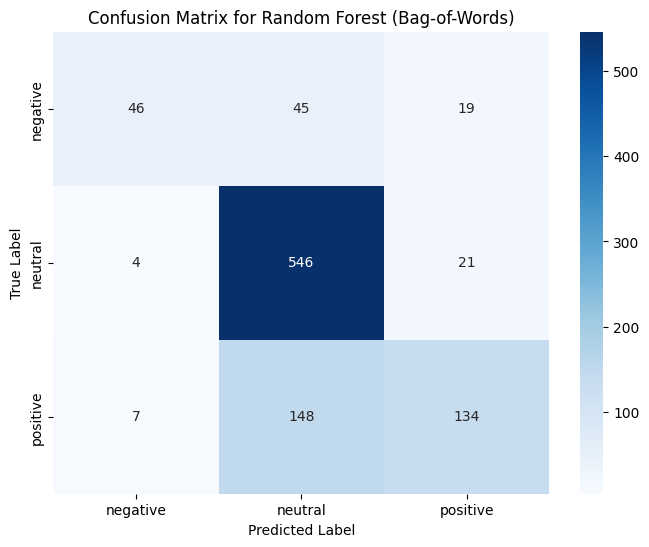

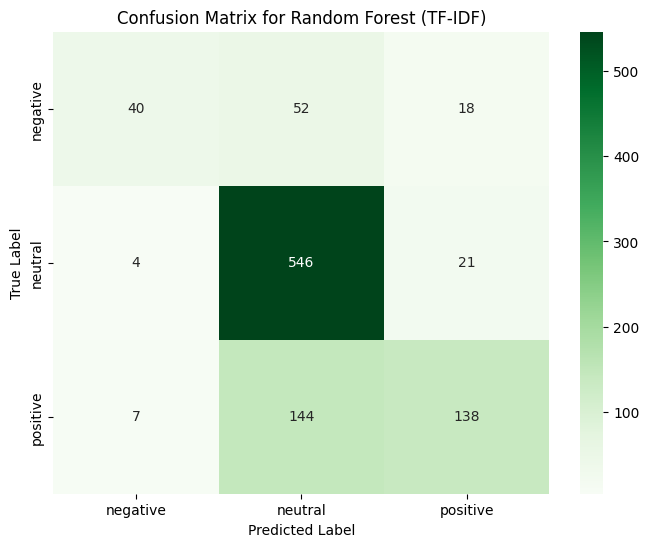

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Confusion Matrix for Random Forest (Bag-of-Words) ---
cm_bow = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_bow.classes_, yticklabels=rf_bow.classes_)
plt.title('Confusion Matrix for Random Forest (Bag-of-Words)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Confusion Matrix for Random Forest (TF-IDF) ---
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens',
            xticklabels=rf_tfidf.classes_, yticklabels=rf_tfidf.classes_)
plt.title('Confusion Matrix for Random Forest (TF-IDF)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Comparative Analysis: BoW vs. TF-IDF

##Two Random Forest models were trained—one using Bag-of-Words features and the other using TF-IDF. Their overall performance is nearly identical.

1. Random Forest (BoW)

Accuracy: 0.748

Negative: F1 = 0.55

Neutral: F1 = 0.83

Positive: F1 = 0.58

2. Random Forest (TF-IDF)

Accuracy: 0.746

Negative: F1 = 0.50

Neutral: F1 = 0.83

Positive: F1 = 0.59

##Key Takeaways (Short & Clear)

Overall Accuracy: Almost the same for both models (difference ≈ 0.002).

Negative Class: BoW performs slightly better (higher precision & recall).

Neutral Class: Both models perform equally well with very high recall (0.96).

Positive Class: TF-IDF edges out BoW by a small margin in recall and F1.

Macro/Weighted F1: Nearly identical → both methods behave similarly overall.

Conclusion (1–2 lines)

Both vectorization techniques deliver comparable results with Random Forest. BoW is a bit stronger for detecting negative sentiment, while TF-IDF slightly improves recognition of positive sentiment. Overall, either method works equally well for this dataset.